<a href="https://colab.research.google.com/github/PetrGavrilin/VKR_URFU/blob/main/VKR_part3_LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1>Линейная регрессия</h1>

In [493]:
# импорт необходимых библиотек
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression, Ridge, RidgeCV, Lasso, ElasticNet, ElasticNetCV, SGDRegressor
from sklearn.model_selection import RandomizedSearchCV # для поиска при случайном сэмплирование гиперпараметров
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import mean_squared_error as mse # метрика MSE от Scikit-learn
from sklearn.metrics import r2_score # коэффициент детерминации  от Scikit-learn

In [494]:
try:
  import bottleneck as bn
except:
  !pip install bottleneck
  import bottleneck as bn

In [495]:
# Загрузка файла с функциями, как библиотеки
import sys
sys.path.append('/content')
from vkr_function import print_scores, plot_predict, my_test_train_split

In [496]:
# Загрузка преподготовленных данных
Y = pd.read_csv('/content/flow_rate.csv')
X_tsfel = np.genfromtxt('/content/X_tsfel.csv', delimiter=',')
X_tsfel_savgol = np.genfromtxt('/content/X_tsfel_savgol.csv', delimiter=',')
X_tsfel_rol = np.genfromtxt('/content/X_tsfel_rol.csv', delimiter=',')
borders = pd.read_csv('/content/borders.csv').values.tolist()[0]

Построим модель линейной регрессии на данных, к которым не применялось сглаживание

In [497]:
Y = np.array(Y['Et'])
X = np.array(X_tsfel)[1:]

In [498]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [499]:
#LM = ElasticNetCV(max_iter = 10000)
#LM = Ridge()
LM = LinearRegression()
#LM = RidgeCV()
#LM = SGDRegressor()

In [500]:
Modellica = [
    LinearRegression(),
    Lasso(), Ridge(),
    ElasticNetCV(max_iter = 10000),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1, 10]),
    SGDRegressor()]

scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),"RidgeCV(alphas=[0.001, 0.01, 0.1, 1])",SGDRegressor()
mse,0.001303,0.516604,0.001303,0.001340,0.001303,0.195154
rmse,0.036097,0.718752,0.036099,0.036601,0.036099,0.441763
r2,0.997478,-0.000022,0.997477,0.997407,0.997477,0.622228


In [501]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)


Ошибка на тестовых данных
MSE: 0.00130
RMSE: 0.03610
R2 : 0.99748


In [502]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00081
RMSE: 0.02839
R2 : 0.99844


In [503]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00085
RMSE: 0.02924
R2 : 0.99835


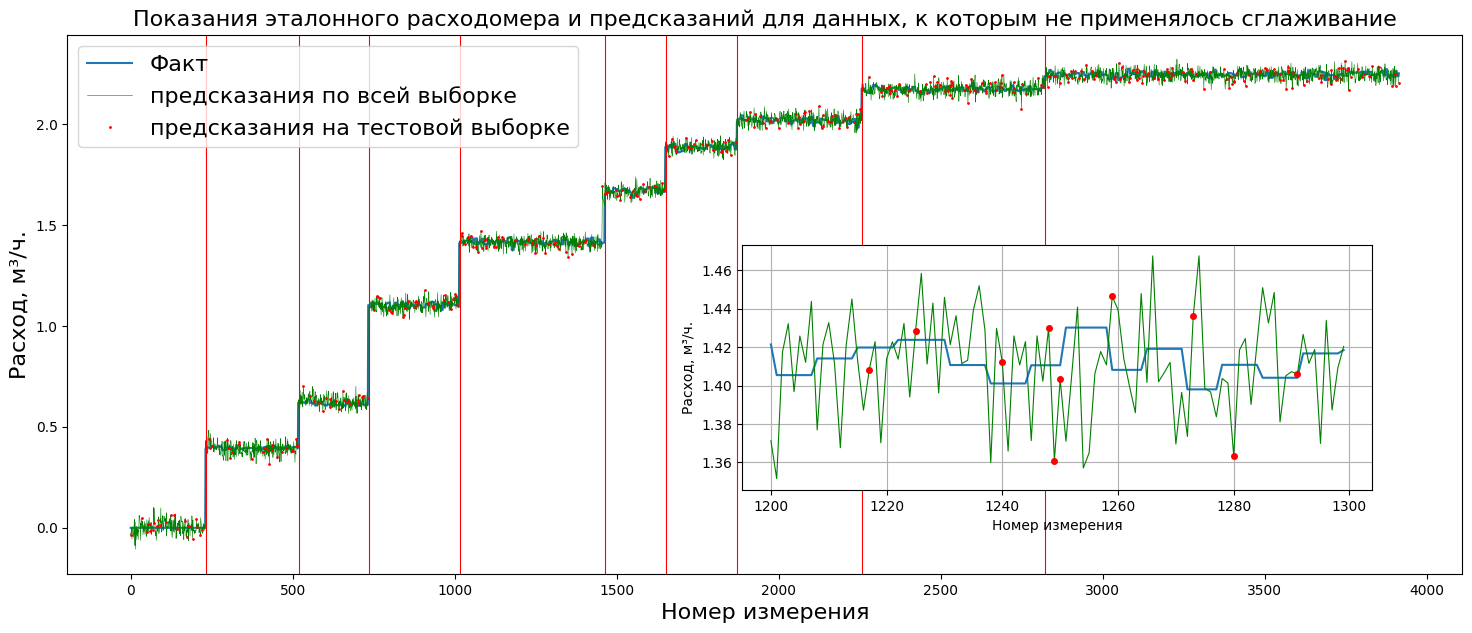

In [504]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="данных, к которым не применялось сглаживание")

In [505]:
y_rolling_all = bn.move_mean(y_predict_all, window=3, min_count=1)
y_rolling_test = bn.move_mean(y_predict, window=3, min_count=1)

In [506]:
y_rolling_all

array([-0.02798843, -0.03158736, -0.02139648, ...,  2.23878463,
        2.22977813,  2.21474632])

In [507]:
print_scores(Y, y_rolling_all)

Ошибка на полных данных
MSE: 0.00050
RMSE: 0.02237
R2 : 0.99903


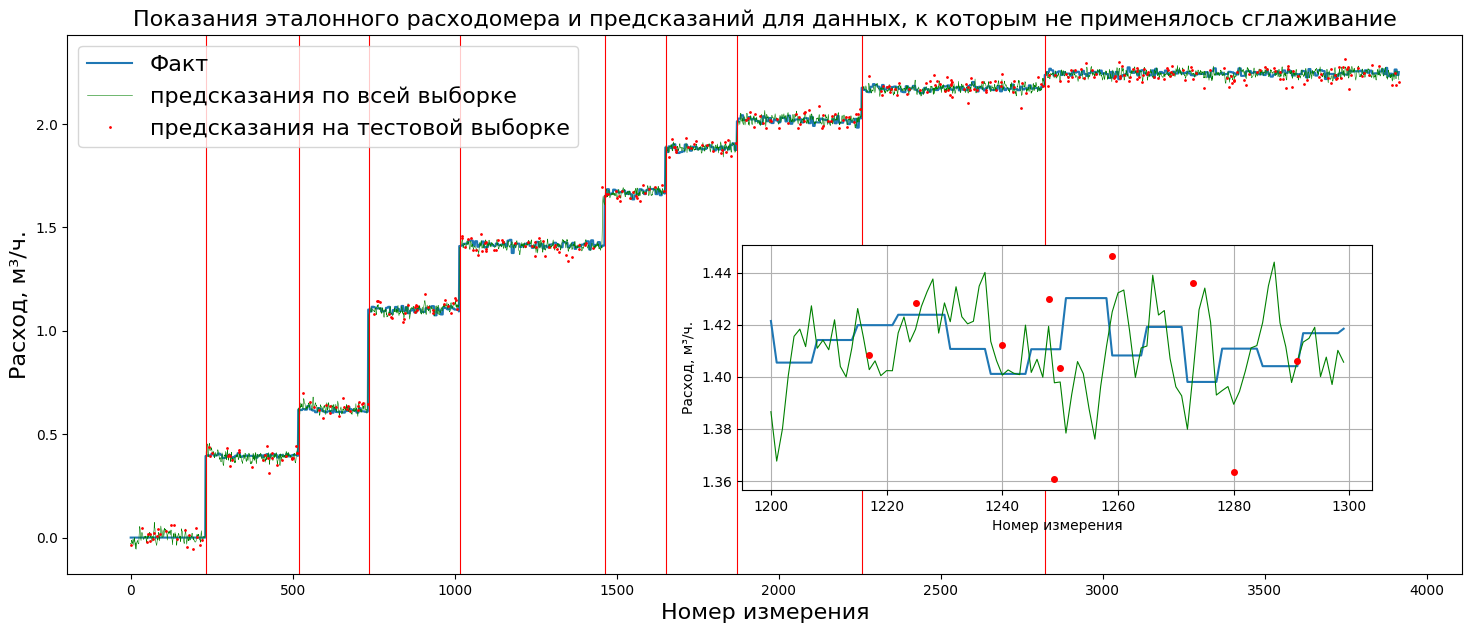

In [508]:
plot_predict(Y, i_test, y_predict, y_rolling_all, borders, text="данных, к которым не применялось сглаживание")

In [509]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [510]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),RidgeCV(),SGDRegressor()
mse,0.002304,0.058269,0.002300,0.002336,0.002302,1.581056
rmse,0.048003,0.241389,0.047956,0.048333,0.047980,1.257400
r2,-7.878294,-223.502675,-7.860737,-8.000489,-7.869789,-6090.618287


In [511]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00230
RMSE: 0.04800
R2 : -7.87829


In [512]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00071
RMSE: 0.02667
R2 : 0.99877


In [513]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00089
RMSE: 0.02990
R2 : 0.99827


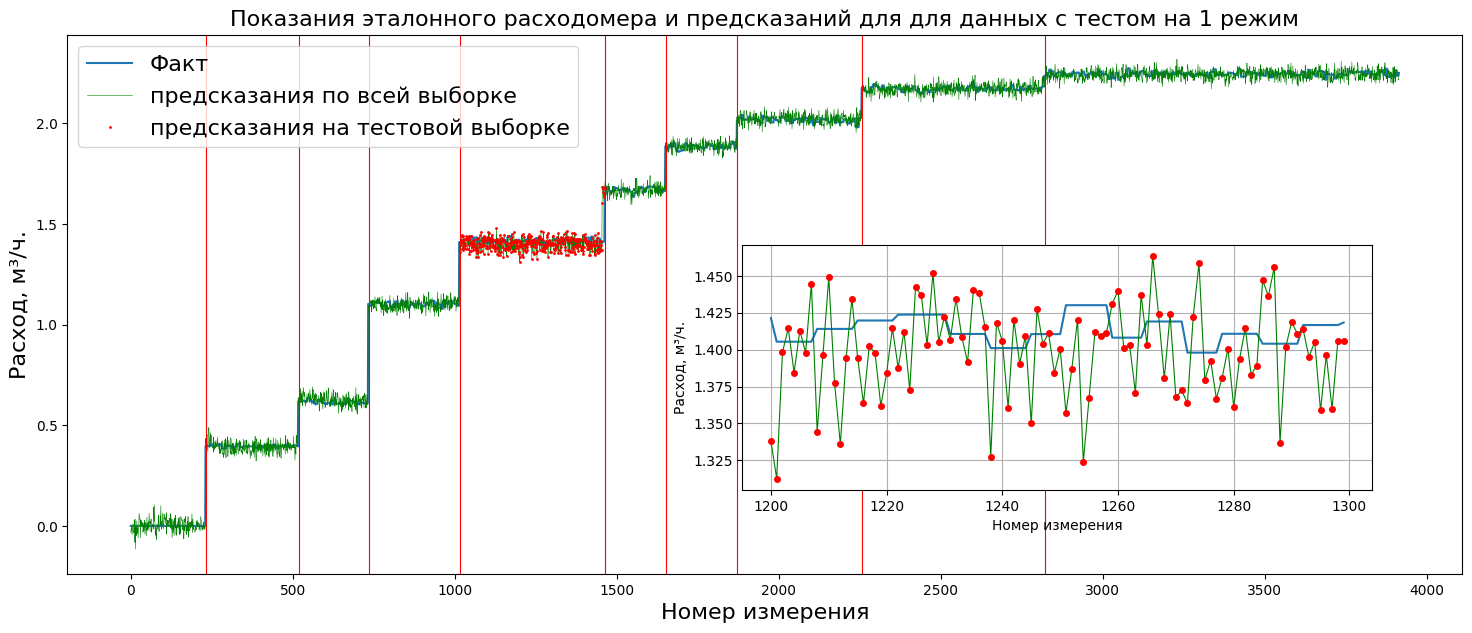

In [514]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных с тестом на 1 режим")

In [515]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [516]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.4053066970897967

In [517]:
y_rolling_all = bn.move_mean(y_predict_all, window=12, min_count=1)
y_rolling_train = bn.move_mean(y_predict_tr, window=12, min_count=1)
y_rolling_test = bn.move_mean(y_predict, window=12, min_count=1)

In [518]:
print_scores(y_test, y_rolling_test, True)
print()
print_scores(y_train, y_rolling_train, True)
print()
print_scores(Y, y_rolling_all, True)

Ошибка на тестовых данных
MSE: 0.00062
RMSE: 0.02493
R2 : -1.39516

Ошибка на тестовых данных
MSE: 0.00095
RMSE: 0.03076
R2 : 0.99836

Ошибка на тестовых данных
MSE: 0.00075
RMSE: 0.02745
R2 : 0.99854


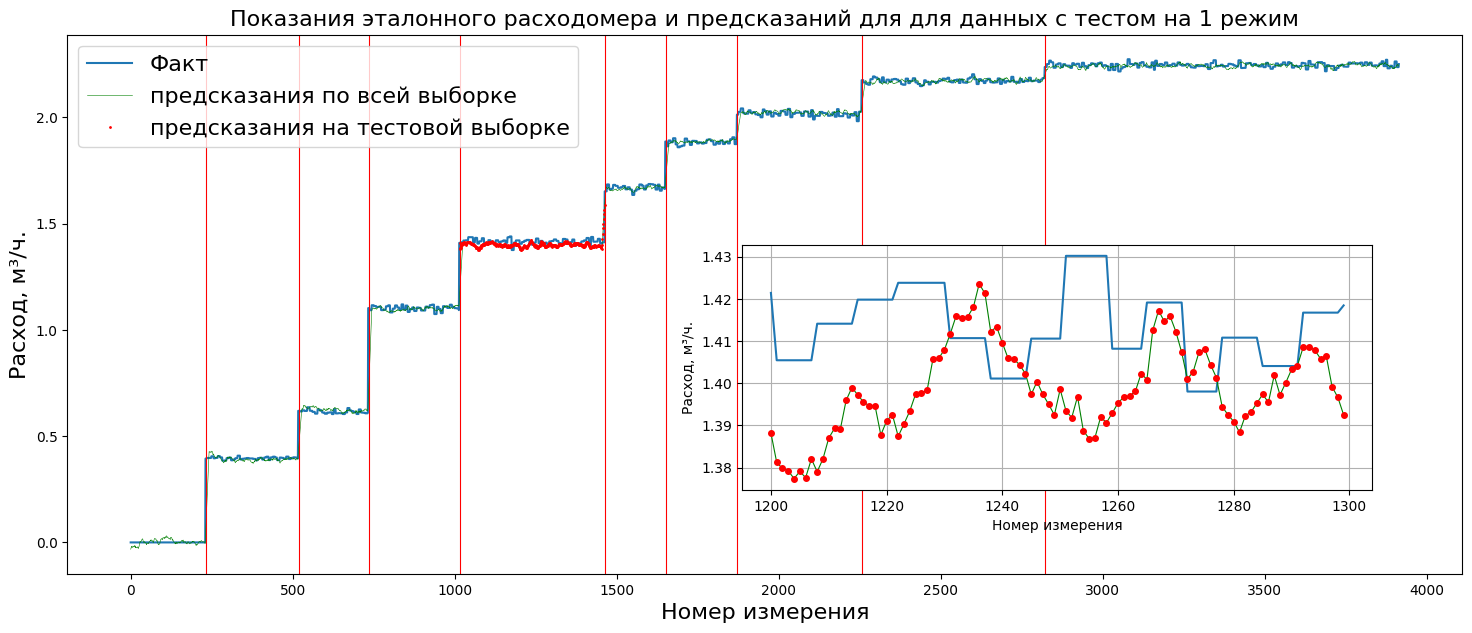

In [519]:
plot_predict(Y, i_test, y_rolling_test, y_rolling_all, borders, text="для данных с тестом на 1 режим")

Из колебаний графика предсказаний вокруг фактических данных, а также учитывая построенный ранее график из исходных данных по разности времён, можно предположить, что для исключения колебаний показания расхода необходимо применить сглаживание к исходным данным.

Обучение модели на дополнительно обработанных данных с помощью функции Савицкого-Голея

In [520]:
X = np.array(X_tsfel_savgol)[1:]


In [521]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [522]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),RidgeCV(),SGDRegressor()
mse,0.000515,0.516032,0.000515,0.000666,0.000515,9.314250e+14
rmse,0.022704,0.718354,0.022694,0.025814,0.022694,3.051926e+07
r2,0.999001,-0.000057,0.999002,0.998709,0.999002,-1.805078e+15


In [523]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00052
RMSE: 0.02270
R2 : 0.99900


In [524]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00025
RMSE: 0.01579
R2 : 0.99952


In [525]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00028
RMSE: 0.01660
R2 : 0.99947


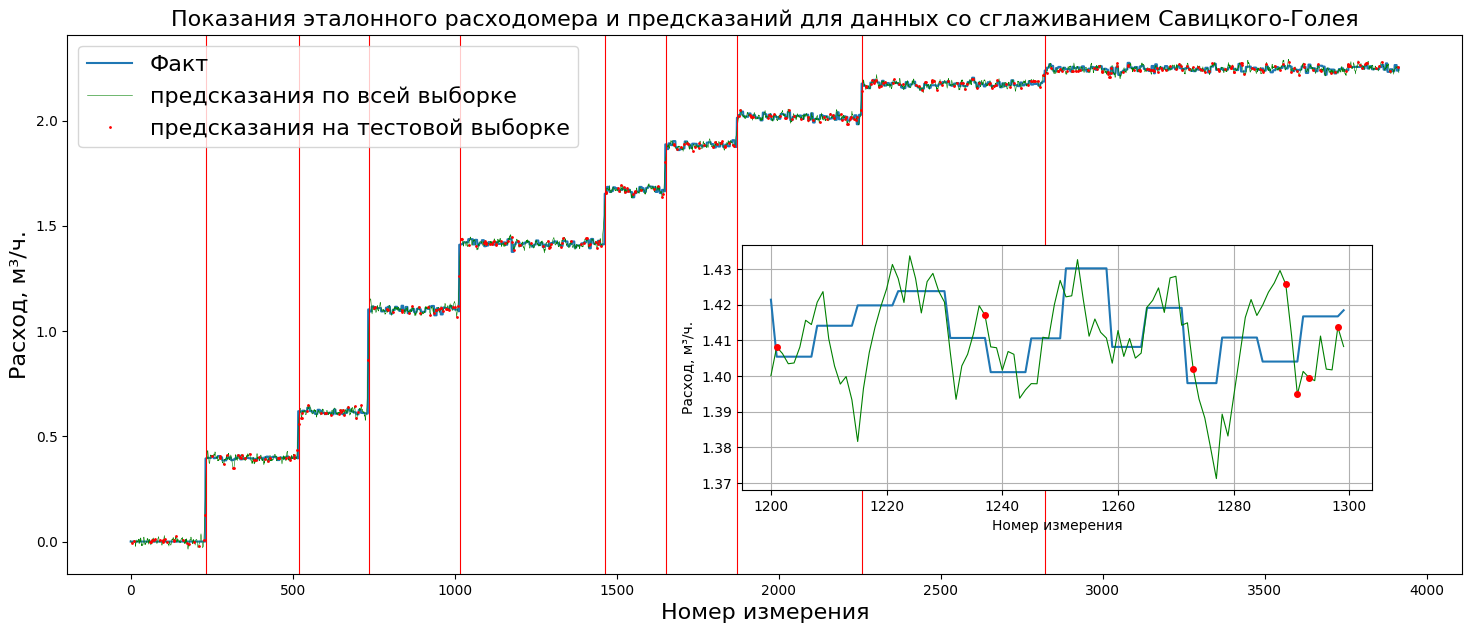

In [526]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="данных со сглаживанием Савицкого-Голея")

Проверим работу модели, приняв за тестовую выборку один из режимов расхода

In [527]:
l_ = len(Y)

i_test = list(range(borders[3],borders[4]))

i_train = list(range(0,l_))
for x1 in i_test:
  i_train.remove(x1)

X_train = X[i_train,:]
y_train = Y[i_train]

X_test = X[i_test,:]
y_test = Y[i_test]

print(len(X_train), len(y_train))

3466 3466


In [528]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),RidgeCV(),SGDRegressor()
mse,0.002090,0.058269,0.001896,0.001558,0.002052,8.020587e+14
rmse,0.045715,0.241389,0.043542,0.039473,0.045303,2.832064e+07
r2,-7.052043,-223.502675,-6.304805,-5.003139,-6.907491,-3.090236e+18


In [529]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00209
RMSE: 0.04572
R2 : -7.05204


In [530]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00021
RMSE: 0.01462
R2 : 0.99963


In [531]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00043
RMSE: 0.02071
R2 : 0.99917


In [532]:
LM.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

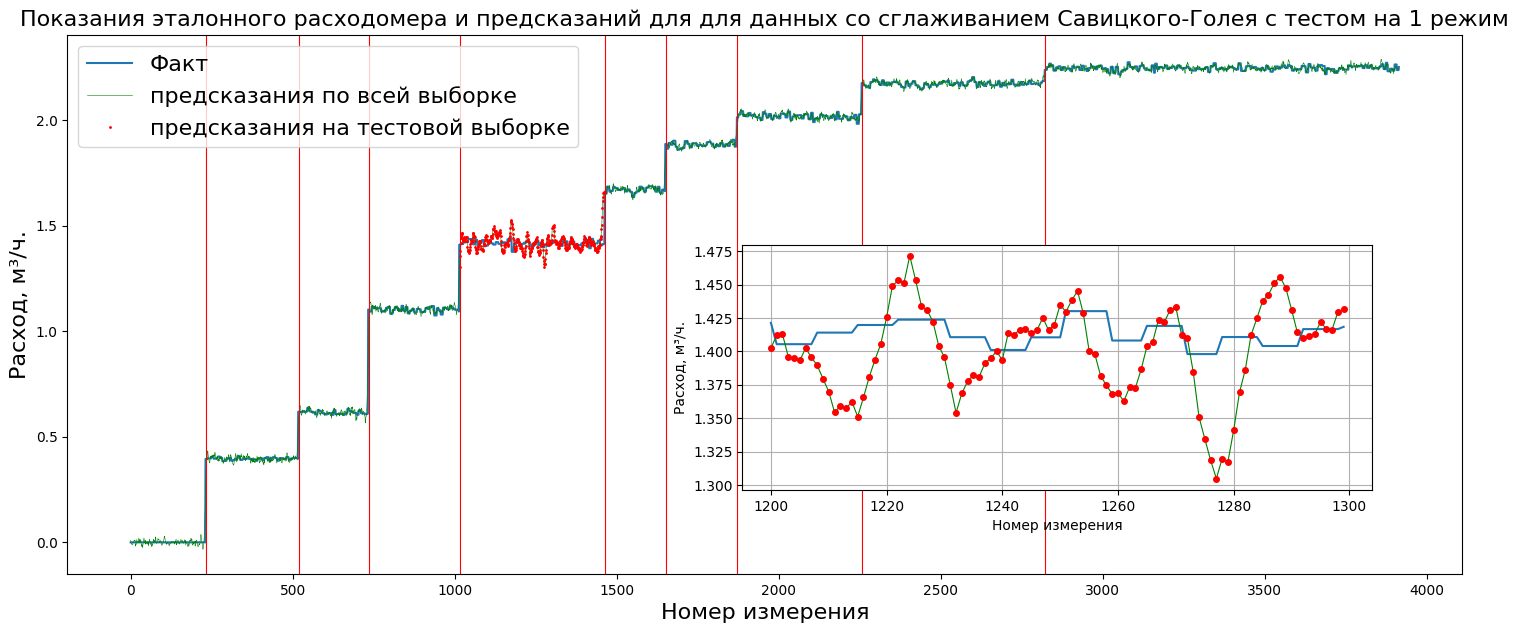

In [533]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со сглаживанием Савицкого-Голея с тестом на 1 режим")

In [534]:
Y[1015:1464].sum()/(1464-1015)

1.4169322693003341

In [535]:
y_predict_all[1015:1464].sum()/(1464-1015)

1.4225035503688015

Построим линейную модель для данных со скользящим средним

In [536]:
X = np.array(X_tsfel_rol)[1:]

In [537]:
X_train, y_train, X_test, y_test, i_test = my_test_train_split(X, Y, borders)

In [538]:
scores = pd.DataFrame(index=['mse', 'rmse', 'r2'])

for model in Modellica:
  model.fit(X_train, y_train)
  y_predict = model.predict(X_test)
  scores.insert(
      len(scores.columns),
      model,
      [mse(y_test,y_predict),mse(y_test,y_predict,squared=False),r2_score(y_test,y_predict)]
      )

scores

,LinearRegression(),Lasso(),Ridge(),ElasticNetCV(max_iter=10000),RidgeCV(),SGDRegressor()
mse,0.000806,0.515362,0.000817,0.001420,0.000817,1.791855e+21
rmse,0.028386,0.717887,0.028581,0.037677,0.028581,4.233031e+10
r2,0.998436,-0.000034,0.998415,0.997245,0.998415,-3.477005e+21


In [539]:
# Обучение модели и вывод метрик
LM.fit(X_train, y_train)
y_predict = LM.predict(X_test)
print_scores(y_test, y_predict, True)

Ошибка на тестовых данных
MSE: 0.00081
RMSE: 0.02839
R2 : 0.99844


In [540]:
y_predict_tr = LM.predict(X_train)
print_scores(y_train, y_predict_tr, False)

Ошибка на тренировочных данных
MSE: 0.00037
RMSE: 0.01923
R2 : 0.99928


In [541]:
y_predict_all = LM.predict(X)
print_scores(Y, y_predict_all)

Ошибка на полных данных
MSE: 0.00041
RMSE: 0.02032
R2 : 0.99920


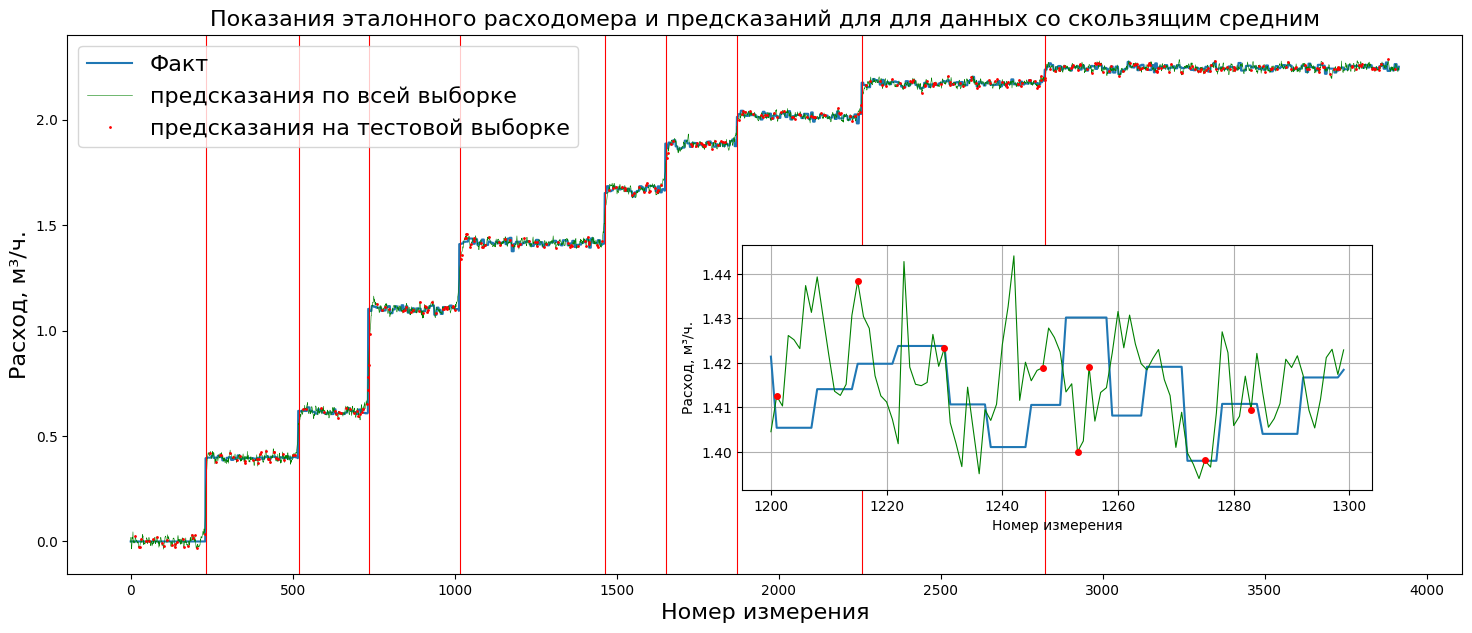

In [542]:
plot_predict(Y, i_test, y_predict, y_predict_all, borders, text="для данных со скользящим средним")